# Data: Past, Present, Future |  Lab 4  |  2/09/2017


# The Role of Statistical Entities in Society: Least Squares, Linear Regression, and Machine Learning, oh my! 

In [11]:
# To grab this notebook 
# and other needed files, use the following command: 
!wget https://data-ppf.github.io/labs/lab4/Lab4.ipynb!wget https://data-ppf.github.io/labs/lab4/Residuals.jpeg!wget https://data-ppf.github.io/labs/lab4/Star.obs.jpeg

/bin/sh: 1: Syntax error: end of file unexpected


In [ ]:
# To ensure images in this notebook are displayed
# properly, please execute this block of code.

%matplotlib inline
from IPython.display import Image
from IPython.core.display import HTML

## Recall the "double role" of statistics in Politics:
1. <b>construction of statistical entities</b>: "stable objects" can be measured and used as forms of evidence and certainty (e.g., the GDP, unemployment, life expectation, citation indexs, etc.)
2. <b>explication and analysis of relationships between entities</b>: what are the relationships between objects and how does changing one influence others? 
                                         -  (Desrosieres 61)
        
### Central Question: Does machine learning change the role of statistical entities in society?  Or, does machine learning matter?

<b>Tentative claim</b>: The form of this answer is historical, material, and technical. 

#### Aside: ML christens old techniques as ML techniques (e.g., linear regression!)  

## Understanding Statistical Entities: 
#### Least Squares, Gaussians, and Regression
Rather than take a contemporary issue, let's see how the investigation of the history of a particular statistical technique gives us insight into how statistical entities are created and how they are used to make arguments. 

#### How did linear regression become thinkable? 
What problem was least squares suppose to solve? (Hint: recall Lengendre in 1805; what was the Laplace-Gaussian synthesis circa 1810?)

 ### Empirical Tradition
In the 18th century astronomers and physicists had a bunch of separate observations of a particular object of insterest (e.g., many observations of, say, the distance between a binary star system on different days and at different observatories) but it was not clear these observations could be combined.   
 
For cases involving objects whose existence was not in doubt (e.g., planets, stars, etc.), an empirical tradition existed which attempted to identify the "real" value of an observation by minimizing the sum of the squares of the "residuals". To wit:


![Residuals!](Residuals.jpeg)

We can write down each residual, $r_i$, as 

$ r_i = y_i - y b$  .  .  .  .  .[eq 1]

which is the distance between the $i^{th}$ observation $y_i$ and the best fit line $y = (x_i)^T b$ in blue above. (In practice, since this holds for an arbritrary number of dimensions, $y = (x_i)^T b$ is actually a hyperplane, but in 2-dimensions this is just a line.) 


          
          

We know from Desrosieres that linear regression doesn't really begin to take the form we are used to till Galton and Karl Pearson arrive on the seen in the second half of the 19th century. But that gets ahead of our story: first we need to understand what the Gauss-Laplace synthesis was that Desrosieres discusses, and how this synthesis lead to the gaussian being the "correct" distribution to use for a range of activities *unrelated to measuring error*. 

Imagine we are measuring the position of a star *in only 1-dimension*, i.e., we are measuring a star only along the x-axis.
![star_obs](Star.obs.jpeg)
Error made things difficult: How combine multiple observations for a single object? (How solve for variables that are overdetermined?) 

<b>18th Century Answers to this problem:</b>
- Average observations to reduce number of equations!
- minimize the sum of absolute values of residuals!

## Legendre's answer in 1805? (Hint: See also Gauss' answer in 1795?)
- formally similar approach to linear regression performed by Karl Pearson and Galton in the 1890s, but very different interpretations...

## Gauss-Laplace Synthesis and the Modelling of Error (i.e., the epistemic tradition)
- Theoretical description of error: tried lines ($-mx+b$), exponentials ($exp^{-x}$), logarithms ($log(c/x)$), but gaussians ($exp^{-x^2}$) eventually "won" out.

#### Why did Gaussians eclipse other models of error?
#### Disciplinary Aside: Gaussians in other fields...

## Laplace in 1810!

What did he discover?

In [218]:
from numpy.random import beta
from scipy.stats import beta as scipy_beta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# generates S samples of N randomly sampled variables
def samples_from_beta(num_of_samples, sample_size):
    samples = beta(.5, .5, [num_of_samples, sample_size]) #NOTE THIS DISTRIBUTION IS NOT A GAUSSIAN
    return samples

# Need to write! 
#def means_of_samples(samples_from_beta, num_of_samples, sample_size):


test = samples_from_beta(2, 2)
print(test)
print(test.mean())
a = (test[1][0]+test[1][1])/2
print(a)
b = (test[0][0]+test[0][1])/2
print(b)
c = (a+b)/2
print(c)
#print(means_of_samples(test, 2, 2))

#print(samples_of_random_vars(5,10))
#print(samples_of_random_vars(5,10).mean())

def gaussian_curve_overlay(data, x):
    sigma = data.std()
    mu = data.mean()
    plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r') 
    return



[[ 0.83413213  0.61838363]
 [ 0.00473368  0.93925277]]
0.599125553243
0.471993225945
0.726257880541
0.599125553243
[ 0.72625788  0.47199323]


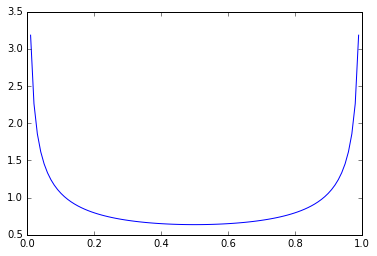

In [197]:
## A beta distribution is nothing like a gaussian!
## Rerun with different a and b values to explore different betas.
##Aside: Karl Pearson made the beta distribution well-known to stats


## Pick different $\alphas$ and $\betas$ for beta distribution
#a, b = 1.0, 5.0   # pdf centered on left side
#a, b = 2.0 5.0    # pdf skewed to left, with large right "wing"
a, b = 0.5, 0.5    # pdf nothing like a gaussian

#plot beta
x = np.linspace(scipy_beta.ppf(0.0, a, b), scipy_beta.ppf(1.0, a, b), 100)
f = scipy_beta(a, b)
plt.plot(x, f.pdf(x))
plt.show()


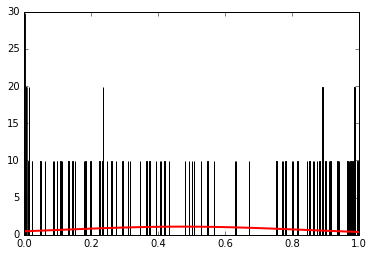

In [225]:
x = np.linspace(0, 1, 100)
num_of_samples = 10
num_of_random_vars = 10
data = samples_of_random_vars(num_of_samples, num_of_random_vars)
#data = means_of_samples(samples_from_beta(num_of_samples, num_of_random_vars), \
#                        num_of_samples, num_of_random_vars)
plt.hist(data, x, normed=True)
gaussian_curve_overlay(data, x)
plt.show()

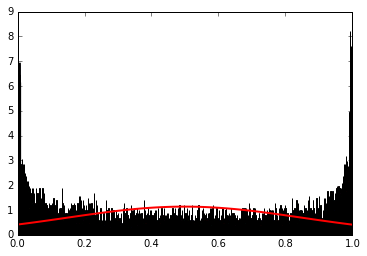

In [226]:
x = np.linspace(0, 1, 100)
num_of_samples = 1000
num_of_random_vars = 10
data = samples_of_random_vars(num_of_samples, num_of_random_vars)
#data = means_of_samples(samples_from_beta(num_of_samples, num_of_random_vars), \
#                        num_of_samples, num_of_random_vars)
plt.hist(data, x, normed=True)
gaussian_curve_overlay(data, x)
plt.show()

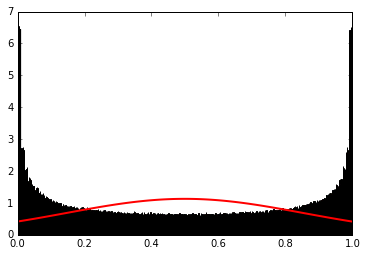

In [227]:
x = np.linspace(0, 1, 100)
num_of_samples = 100000
num_of_random_vars = 10
data = samples_of_random_vars(num_of_samples, num_of_random_vars)
#data = means_of_samples(samples_from_beta(num_of_samples, num_of_random_vars), \
#                        num_of_samples, num_of_random_vars)
plt.hist(data, x, normed=True)
gaussian_curve_overlay(data, x)
plt.show()

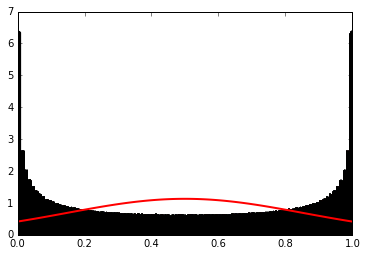

In [228]:
x = np.linspace(0, 1, 100)
num_of_samples = 1000000
num_of_random_vars = 10
data = samples_of_random_vars(num_of_samples, num_of_random_vars)
#data = means_of_samples(samples_from_beta(num_of_samples, num_of_random_vars), \
#                        num_of_samples, num_of_random_vars)
plt.hist(data, x, normed=True)
gaussian_curve_overlay(data, x)
plt.show()

### NOTE THAT BETA Distribution is not a  gaussian distrib, but the mean sum of random variables sampled from a beta dist does end up being a gaussian. Laplace saw this and realized that G's least squares approach could handle error of  any distribution --> why gaussian becomes ubiquitous...

In [47]:
# Queletet and constant causes 

## Linear Regression
- What kind of machine learning technique is linear regression? (Contemporary context)
        - Three kinds of ML techniques
    
- What problem was Francis Galton and Karl Pearson were interested in solving? 
        

[ 1.19793231 -1.81609141 -0.24166542 ...,  2.04205179  0.01570836
 -0.39320164]


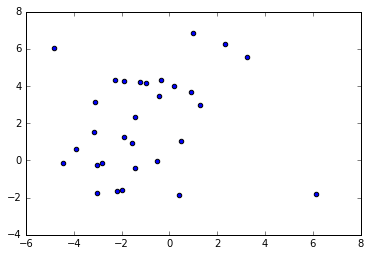

In [52]:
#data = pd.read_csv('some_data_that_I_havent uploaded yet')
from numpy.random import normal
mu, sigma = 0, 2.0
random_x = normal(mu, sigma, 30)
random_y = normal(2, 3, 30)
print(random_x, random_y)

plt.scatter(random_x, random_y)


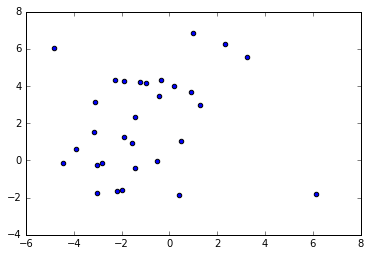

In [96]:
d = {'x' : pd.Series(random_x),  'y' : pd.Series(random_y)}
dat = pd.DataFrame(d)

plt.scatter(dat["x"], dat["y"])

Linear Regression:

$y = \beta_n x_n + ... + \beta_1 x_1 + \mu_0$

but for just one variable

$y = \beta_1 x_1 + \mu$ 

where $\beta_1$ is the slope, $x_1$ is observations, and $\mu$ is the y-intercept.  

In [124]:
import statsmodels.formula.api as sm
sm_lm = sm.ols(data = dat, formula = "y ~ x").fit()

print(sm_lm.summary())
print("----")
print(sm_lm.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.7272
Date:                Thu, 16 Feb 2017   Prob (F-statistic):              0.401
Time:                        02:42:12   Log-Likelihood:                -71.096
No. Observations:                  30   AIC:                             146.2
Df Residuals:                      28   BIC:                             149.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2283      0.534      4.171      0.0

Thus we get:
    
$y = 0.179871x_1 + 2.2282744$

which we can easily plot:

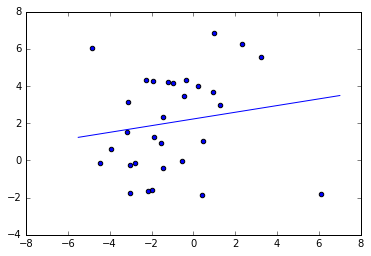

In [165]:
plt.scatter(dat["x"], dat["y"])
x = np.linspace(-5.5, 7, 100)
plt.plot(x,0.179871*x + 2.2282744)

[-3.16078931 -1.98352375  2.32966508  3.22921182 -0.98558188 -1.90936348
  0.47525128 -2.17208709 -1.45094607 -1.43594371 -0.52406579 -3.91469161
  0.41286081 -3.02330117 -2.81122408 -4.84260332 -4.46266056 -1.21417622
 -3.1221303   0.20484214 -1.55614983 -0.34777641  6.11932079 -3.01873999
 -2.26149348  1.2762682   0.92174112  1.0009333  -0.43409239 -1.89297708]
[[-3.16078931]
 [-1.98352375]
 [ 2.32966508]
 [ 3.22921182]
 [-0.98558188]
 [-1.90936348]
 [ 0.47525128]
 [-2.17208709]
 [-1.45094607]
 [-1.43594371]
 [-0.52406579]
 [-3.91469161]
 [ 0.41286081]
 [-3.02330117]
 [-2.81122408]
 [-4.84260332]
 [-4.46266056]
 [-1.21417622]
 [-3.1221303 ]
 [ 0.20484214]
 [-1.55614983]
 [-0.34777641]
 [ 6.11932079]
 [-3.01873999]
 [-2.26149348]
 [ 1.2762682 ]
 [ 0.92174112]
 [ 1.0009333 ]
 [-0.43409239]
 [-1.89297708]]


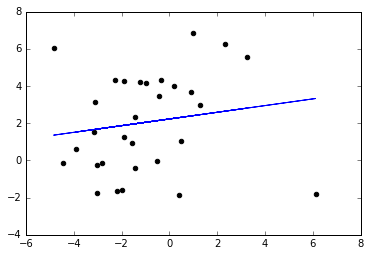

In [216]:
# We can do the same thing in scikit-learn and its faster and therefore more useful when handling slightly bigger data sets

from sklearn import linear_model

dat_array = np.asarray(dat)
skl_lm = linear_model.LinearRegression()
x = dat.x.values
print(x)
x = x.reshape(len(x), 1)
print(x)

# now same for y
y = (dat.y.values).reshape(len(y), 1)

# generate model
skl_lm.fit(x, y)

# plot fit line
plt.scatter(x, y,  color='black')
plt.plot(x, skl_lm.predict(x), color='blue', linewidth=1)
plt.show()